In [163]:
#Import required Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
#Import dataset
df = pd.read_csv(r'C:\Users\Tony\Downloads\archive\walmart-sales-dataset-of-45stores.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [166]:
#Check Empty Cells
df[df.columns].isnull().sum()
#There is no empty cells

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [170]:
#cleaning data of wrong format
df['Date']=pd.to_datetime(df['Date'])
print(df.to_string())

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0         1 2010-05-02    1643690.90             0        42.31       2.572  211.096358         8.106
1         1 2010-12-02    1641957.44             1        38.51       2.548  211.242170         8.106
2         1 2010-02-19    1611968.17             0        39.93       2.514  211.289143         8.106
3         1 2010-02-26    1409727.59             0        46.63       2.561  211.319643         8.106
4         1 2010-05-03    1554806.68             0        46.50       2.625  211.350143         8.106
5         1 2010-12-03    1439541.59             0        57.79       2.667  211.380643         8.106
6         1 2010-03-19    1472515.79             0        54.58       2.720  211.215635         8.106
7         1 2010-03-26    1404429.92             0        51.45       2.732  211.018042         8.106
8         1 2010-02-04    1594968.28             0        62.27       2.719  210.8

In [87]:
#Removing Duplicates
print(df.duplicated().to_string())
df.drop_duplicates(inplace = True)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

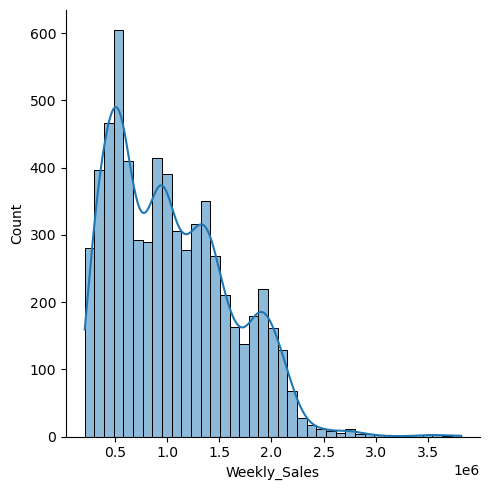

In [202]:
#visualize quantitative variables distributions 'Weekly_Sales'
sns.displot(df['Weekly_Sales'], kde=True)
plt.tight_layout()
plt.show()

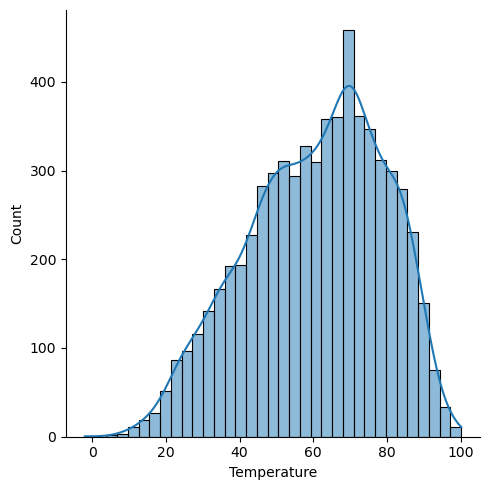

In [203]:
#visualize quantitative variables distributions 'Temperature'
sns.displot(df['Temperature'], kde=True)
plt.tight_layout()
plt.show()

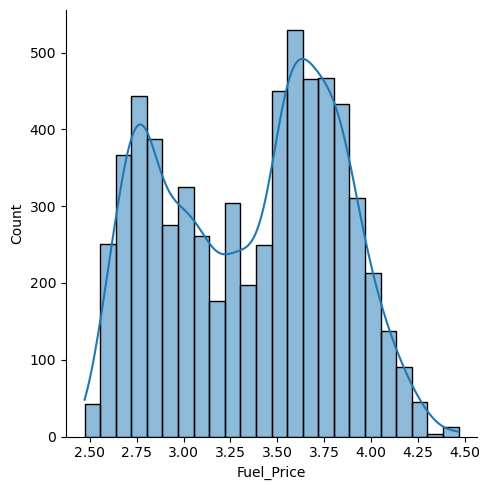

In [204]:
#visualize quantitative variables distributions 'Fuel_Price'
sns.displot(df['Fuel_Price'], kde=True)
plt.tight_layout()
plt.show()

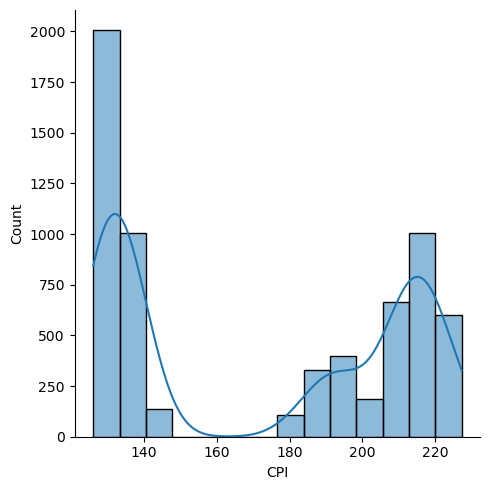

In [205]:
#visualize quantitative variables distributions 'CPI'
sns.displot(df['CPI'], kde=True)
plt.tight_layout()
plt.show()

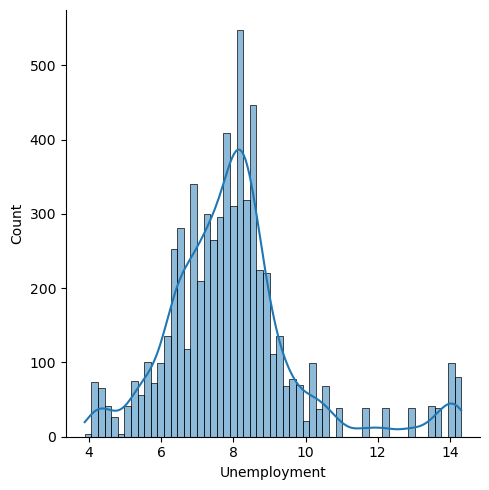

In [206]:
#visualize quantitative variables distributions 'Unemployment'
sns.displot(df['Unemployment'], kde=True)
plt.tight_layout()
plt.show()

In [188]:
#a) Which store has maximum sales?
#group by stores and find the sum of the weekly sales of each store
total_sales= df.groupby('Store')['Weekly_Sales'].sum().round().sort_values(ascending = False) 
#sort descending and print the first one which is the max
pd.DataFrame(total_sales).head(1)

,Weekly_Sales
Store,
20,301397792.0


In [189]:
#b) Which store has maximum standard deviation
#group by stores and find the standard deviation of the weekly sales of each store
stores_std = df.groupby('Store')['Weekly_Sales'].std().round().sort_values(ascending = False) 
#sort descending and print the first one which is the max
pd.DataFrame(stores_std).head(1)

,Weekly_Sales
Store,
14,317570.0


In [201]:
#c) Some holidays have a negative impact on sales. Find out holidays that have higher sales than the mean sales in the non-holiday season for all stores together.
#to solve c we need to know dates of holidays
Holiday = df[df['Holiday_Flag'] == 1]
Holiday_Dates = Holiday['Date']
Holiday_Dates.drop_duplicates(inplace = True)
print (Holiday_Dates)

1     2010-12-02
31    2010-10-09
42    2010-11-26
47    2010-12-31
53    2011-11-02
83    2011-09-09
94    2011-11-25
99    2011-12-30
105   2012-10-02
135   2012-07-09
Name: Date, dtype: datetime64[ns]


C:\Users\Tony\AppData\Local\Temp\ipykernel_15716\556333171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Holiday_Dates.drop_duplicates(inplace = True)


In [200]:
#c)
#from Dataset Description and using internet decided the date to which holiday
Super_Bowl = ['2010-12-02', '2011-11-02', '2012-10-02']
Labour_Day = ['2010-10-09', '2011-09-09', '2012-07-09']
Thanksgiving = ['2010-11-26', '2011-11-25']
Christmas = ['2010-12-31', '2011-12-30']
#calaculate the mean of weekly sales for each holiday 
Super_Bowl_Sales = (pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Labour_Day_Sales = (pd.DataFrame(df.loc[df.Date.isin(Labour_Day)]))['Weekly_Sales'].mean()
Thanksgiving_Sales = (pd.DataFrame(df.loc[df.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
Christmas_Sales = (pd.DataFrame(df.loc[df.Date.isin(Christmas)]))['Weekly_Sales'].mean()
#calaculate the mean of weekly sales for non holiday days
Non_Holiday_Sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()
#print holidays which have higher sales than the mean sales in the non-holiday season
Holidays = ['Super_Bowl', 'Labour_Day','Thanksgiving', 'Christmas']
Holiday_Sales = [Super_Bowl_Sales, Labour_Day_Sales, Thanksgiving_Sales, Christmas_Sales]
for i in range(4):
    if Holiday_Sales[i] > Non_Holiday_Sales:
        print((Holidays[i], Holiday_Sales[i]))

('Super_Bowl', 1079127.9877037033)
('Labour_Day', 1042427.2939259257)
('Thanksgiving', 1471273.427777778)


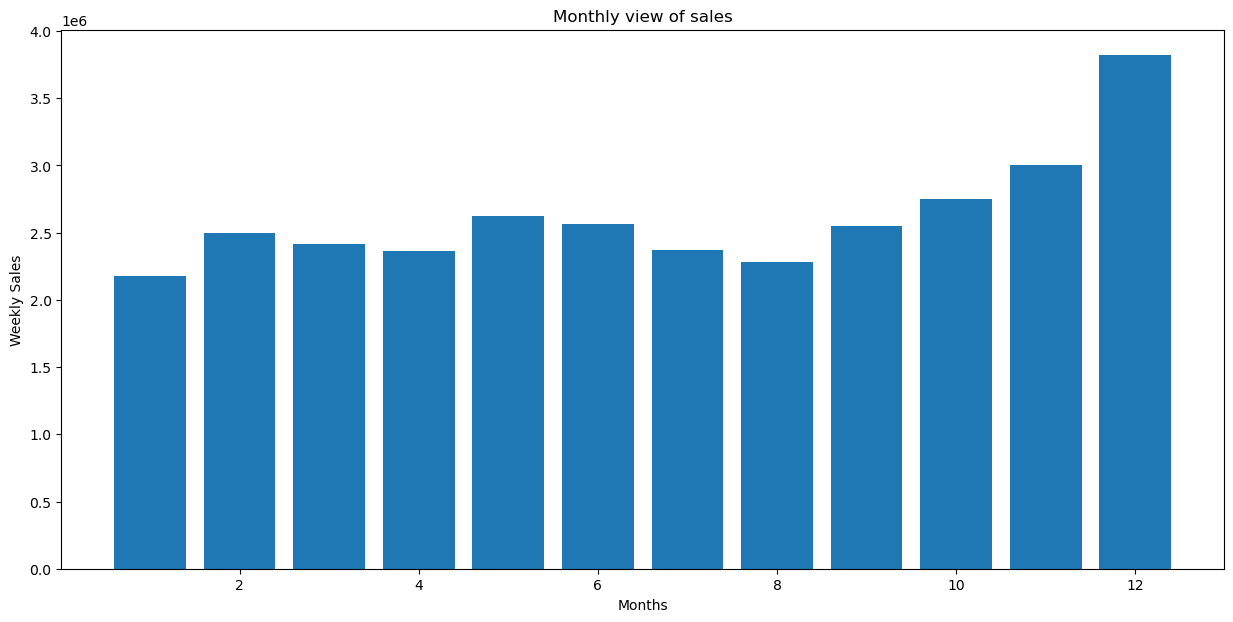

<Figure size 1500x700 with 0 Axes>

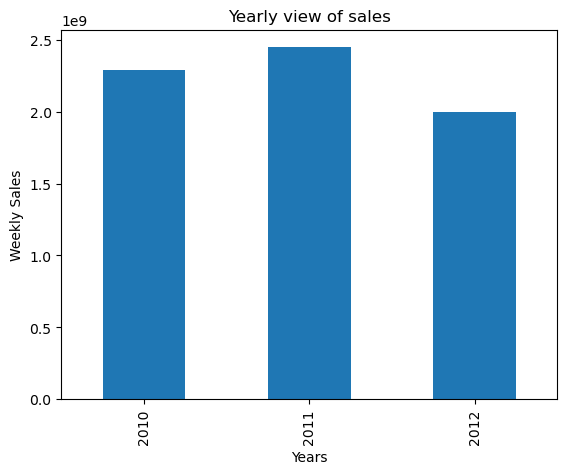

In [181]:
#d) Provide a monthly and semester view of sales in units and give insights.
#Splitting date column into month and year then plot them
df["Month"] = pd.DatetimeIndex(df["Date"]).month
plt.figure(figsize=(15,7))
plt.bar(df["Month"],df["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

df["Year"] = pd.DatetimeIndex(df["Date"]).year
plt.figure(figsize=(15,7))
df.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")
plt.show()
#insights: overall monthly sales are higher in December while the yearly sales in 2011 are the highest.